# Annotation of hematopoietic progenitors 

### Further subsetting of progenitors

In [818]:
progenitors = adata.obs_names[np.where(adata.obs[["anno_lvl_2_LYMPHOID", 'anno_lvl_2_MYELOID']].isna().sum(1)==0)]
close2progenitors_labels = ["PRE_PRO_B", 'DN(P)_DN(EARLY)_T', "MEMP", "HSC_MPP", "PROMONOCYTE", "PROMONOCYTE(PROLIFERATING)"]
close2progenitors = adata.obs_names[adata.obs.anno_lvl_2_final_clean.isin(close2progenitors_labels)]

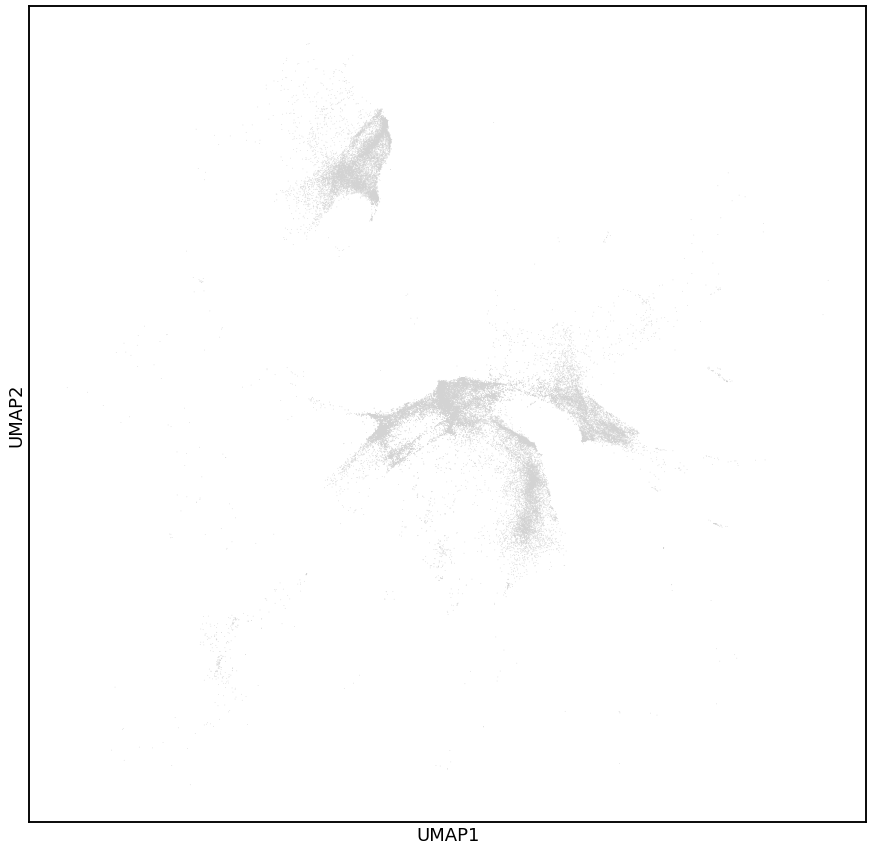

In [819]:
sc.pl.umap(adata[progenitors.append(close2progenitors)])

In [780]:
# prog_adata_2 = anndata.AnnData(obs=prog_adata.obs, var=prog_adata.var)
# prog_adata_2.obsm["X_scvi"] = prog_adata.obsm['X_scvi'].copy()

# sc.pp.neighbors(prog_adata_2, n_neighbors=30, use_rep="X_scvi")

# sc.tl.leiden(prog_adata_2, resolution=1.5)

# sc.tl.umap(prog_adata_2)

# sc.pl.umap(prog_adata_2, color=["leiden", "anno_lvl_2_final"])

In [782]:
# anno_unif = adata.obs[["uniform_label_expanded_merged","uniform_label_lvl0"]].drop_duplicates()
# hsc_immune_lvl0 = ["LYMPHOID", "MYELOID", "HSC_MPP", "MEGAKARYOCYTE", "ERYTHROID", "EO_BASO_MAST"]

# splitting_labels["HSC_PROGENITORS"] = anno_unif["uniform_label_expanded_merged"][anno_unif["uniform_label_lvl0"].isin(["HSC_MPP"])].values.tolist()

In [821]:
sdata = adata[progenitors.append(close2progenitors)]

In [824]:
s = "HSC_PROGENITORS"

In [825]:
adata_2 = sc.read_h5ad('{d}PAN.A01.v01.entire_data_normalised_log.{t}.HSC_IMMUNE.h5ad'.format(d=data_dir, t=timestamp))
sdata = adata_2[progenitors.append(close2progenitors)]
sdata.write_h5ad('{d}PAN.A01.v01.entire_data_normalised_log.{t}.{s}.h5ad'.format(d=data_dir, t=timestamp, s=s))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [826]:
del adata_2

In [827]:
adata_raw = sc.read_h5ad('{d}PAN.A01.v01.entire_data_raw_count.{t}.HSC_IMMUNE.h5ad'.format(d=data_dir, t=timestamp))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [828]:
# sdata_raw = adata_raw[adata.obs["isin_" + s]==True] 
sdata_raw = adata_raw[progenitors.append(close2progenitors)]
sdata_raw.write_h5ad('{d}PAN.A01.v01.entire_data_raw_count.{t}.{s}.h5ad'.format(d=data_dir, t=timestamp, s=s))

In [ ]:
del adata_raw